In [186]:
!python --version

Python 3.11.5


In [187]:
import numpy as np
import pandas as pd

In [188]:
import pandas as pd

df = pd.read_csv('spam.csv')


In [189]:
df.sample(5)

,v1,v2
2088,ham,"you are sweet as well, princess. Please tell m..."
3136,ham,I've been barred from all B and Q stores for l...
4826,spam,u r a winner U ave been specially selected 2 r...
3370,ham,I am waiting for your call sir.
4314,spam,Someone U know has asked our dating service 2 ...


In [190]:
df.shape

(5577, 2)

In [191]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5576 non-null   object
 1   v2      5576 non-null   object
dtypes: object(2)
memory usage: 87.3+ KB


In [193]:
df.sample(5)

,v1,v2
819,spam,U were outbid by simonwatson5120 on the Shinco...
75,ham,Wah lucky man... Then can save money... Hee...
4092,ham,He needs to stop going to bed and make with th...
2018,spam,Great News! Call FREEFONE 08006344447 to claim...
640,ham,Me n him so funny...


In [194]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4116,ham,"I'll see, but prolly yeah"
3655,ham,Want to send me a virtual hug?... I need one
4594,ham,Tomorrow i am not going to theatre. . . So i c...
3320,ham,I know girls always safe and selfish know i go...
3906,ham,"Right on brah, see you later"


In [195]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [196]:
df['target'] = encoder.fit_transform(df['target'])

In [197]:
df.head()

,target,text
0,0,Rofl. Its true to its name
1,1,give me your atm pin number
2,0,hey its me
3,1,give me your adhaar number
4,1,give me your bank details


In [198]:
# missing values
df.isnull().sum()

target    0
text      1
dtype: int64

In [199]:
# check for duplicate values
df.duplicated().sum()

402

In [200]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [201]:
df.duplicated().sum()

0

In [202]:
df.shape

(5175, 2)

## 2.EDA

In [203]:
df.head()

,target,text
0,0,Rofl. Its true to its name
1,1,give me your atm pin number
2,0,hey its me
3,1,give me your adhaar number
4,1,give me your bank details


In [204]:
df['target'].value_counts()

target
0    4517
1     657
2       1
Name: count, dtype: int64

In [205]:
df['target'].unique()

array([0, 1, 2])

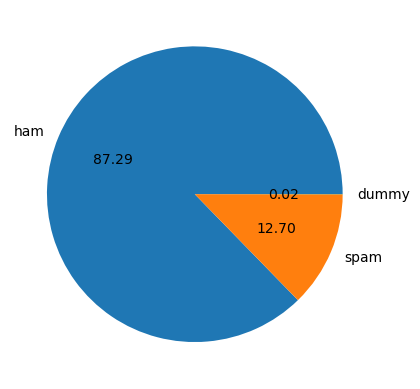

In [206]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam','dummy'],autopct="%0.2f")
plt.show()

In [207]:
# Data is imbalanced

In [208]:
import nltk

In [209]:
!pip install nltk

In [210]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOV0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [211]:

df['num_characters'] = df['text'].apply(lambda x : len(x) if type(x)==str else 0)

In [212]:
df.head()

,target,text,num_characters
0,0,Rofl. Its true to its name,26
1,1,give me your atm pin number,27
2,0,hey its me,10
3,1,give me your adhaar number,26
4,1,give me your bank details,25


In [213]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)) if type(x)==str else 0)

In [214]:
df.head()

,target,text,num_characters,num_words
0,0,Rofl. Its true to its name,26,7
1,1,give me your atm pin number,27,6
2,0,hey its me,10,3
3,1,give me your adhaar number,26,5
4,1,give me your bank details,25,5


In [215]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)) if type(x)==str else 0)

In [216]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Rofl. Its true to its name,26,7,2
1,1,give me your atm pin number,27,6,1
2,0,hey its me,10,3,1
3,1,give me your adhaar number,26,5,1
4,1,give me your bank details,25,5,1


In [217]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5175.000000,5175.000000,5175.000000
mean,78.658164,18.418937,1.964444
std,58.117961,13.332330,1.448608
min,0.000000,0.000000,0.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [218]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4517.000000,4517.000000,4517.000000
mean,70.331193,17.105822,1.819792
std,56.330376,13.494868,1.383129
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [219]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,657.000000,657.000000,657.000000
mean,136.027397,27.474886,2.961948
std,31.832007,7.331422,1.494935
min,4.000000,1.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [220]:
import seaborn as sns

C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

<Axes: xlabel='num_characters', ylabel='Count'>

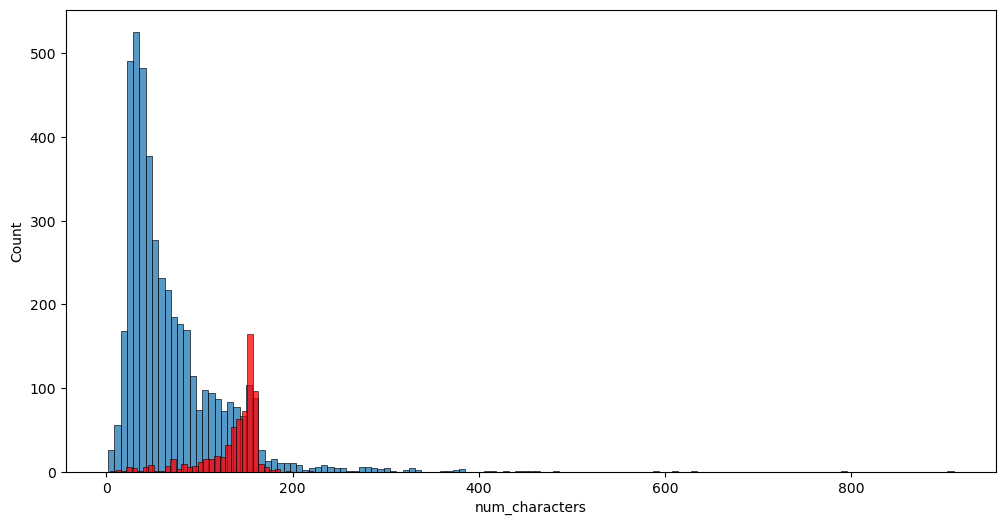

In [221]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

<Axes: xlabel='num_words', ylabel='Count'>

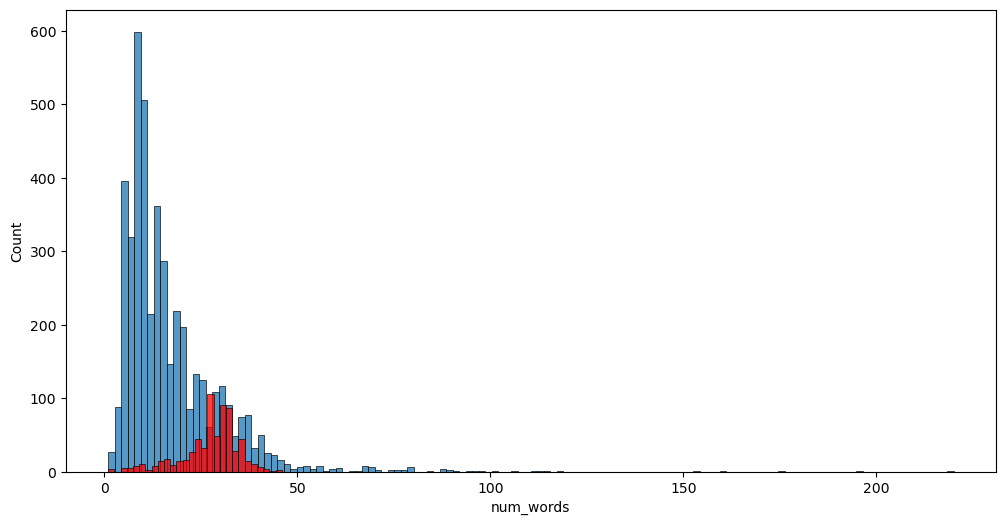

In [222]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

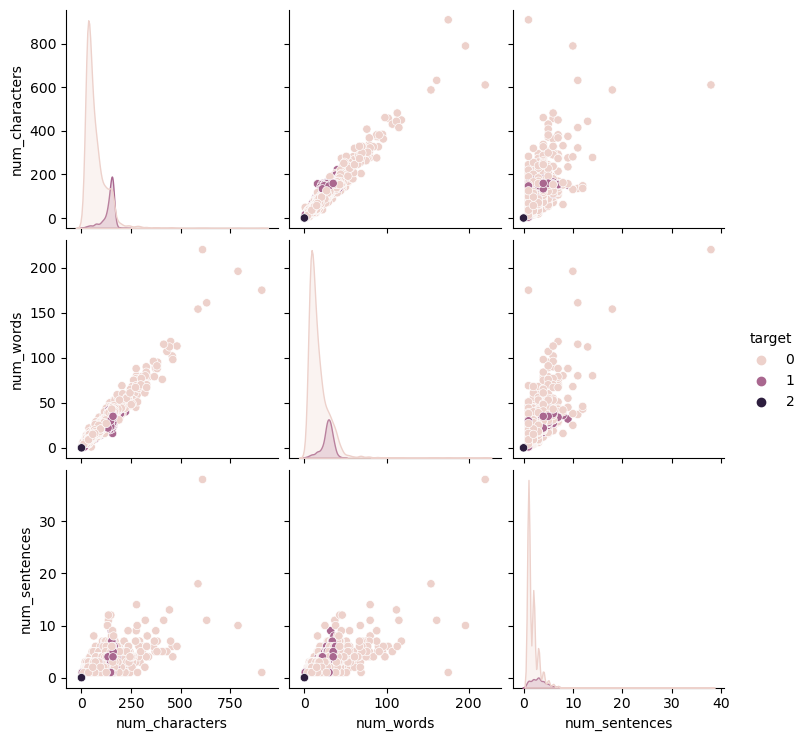

In [223]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [225]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
def transform_text(text):
    if type(text) != str:
        return ''
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [226]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [227]:
df['text'][10]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv"

In [228]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [231]:
df['transformed_text'] = df['text'].apply(transform_text)

In [232]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Rofl. Its true to its name,26,7,2,rofl true name
1,1,give me your atm pin number,27,6,1,give atm pin number
2,0,hey its me,10,3,1,hey
3,1,give me your adhaar number,26,5,1,give adhaar number
4,1,give me your bank details,25,5,1,give bank detail


In [233]:
!pip install wordcloud

In [234]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [235]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

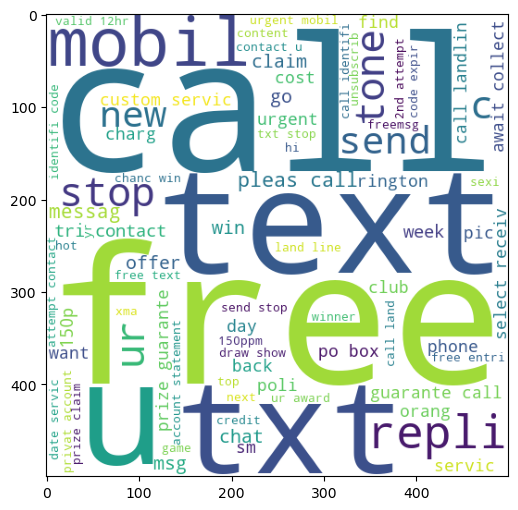

In [236]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [237]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

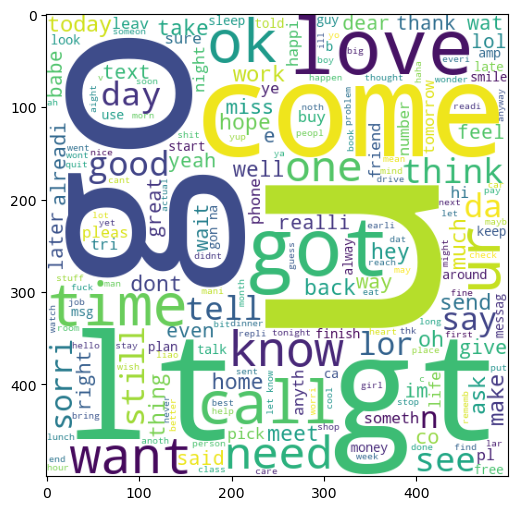

In [238]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [239]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Rofl. Its true to its name,26,7,2,rofl true name
1,1,give me your atm pin number,27,6,1,give atm pin number
2,0,hey its me,10,3,1,hey
3,1,give me your adhaar number,26,5,1,give adhaar number
4,1,give me your bank details,25,5,1,give bank detail


In [240]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [241]:
len(spam_corpus)

10115

C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


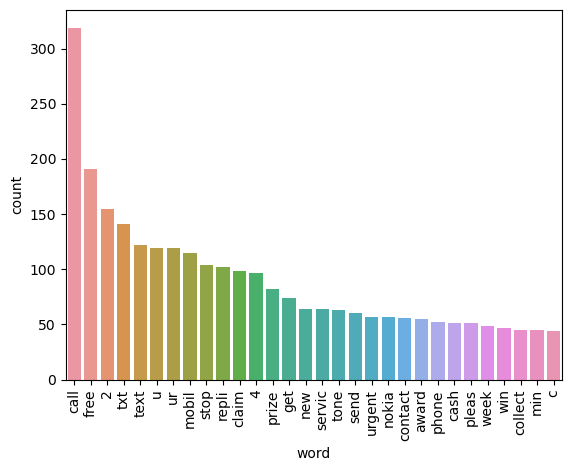

In [242]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
sns.barplot(x='word',y='count',data = common_words)
plt.xticks(rotation='vertical')
plt.show()

In [243]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [244]:
len(ham_corpus)

35381

In [245]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [246]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Rofl. Its true to its name,26,7,2,rofl true name
1,1,give me your atm pin number,27,6,1,give atm pin number
2,0,hey its me,10,3,1,hey
3,1,give me your adhaar number,26,5,1,give adhaar number
4,1,give me your bank details,25,5,1,give bank detail


## 4. Model Building

In [247]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [248]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [249]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [250]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [251]:
X.shape

(5175, 3000)

In [252]:
y = df['target'].values

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [255]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [256]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [257]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

0.8695652173913043
[[791 114   0]
 [ 20 109   0]
 [  0   1   0]]


In [258]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

0.9690821256038648
[[904   1   0]
 [ 30  99   0]
 [  1   0   0]]


In [259]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

0.978743961352657
[[904   1   0]
 [ 20 109   0]
 [  1   0   0]]


In [260]:
!pip install xgboost

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [262]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [263]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [286]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    # precision = precision_score(y_test,y_pred)
    
    return accuracy

In [287]:
train_classifier(svc,X_train,y_train,X_test,y_test)

0.9690821256038648

In [288]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    # precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690821256038648
For  KN
Accuracy -  0.914975845410628
For  NB
Accuracy -  0.9690821256038648
For  DT
Accuracy -  0.9381642512077295
For  LR
Accuracy -  0.9536231884057971
For  RF
Accuracy -  0.9671497584541063
For  AdaBoost
Accuracy -  0.9690821256038648
For  BgC
Accuracy -  0.9584541062801932
For  ETC
Accuracy -  0.9681159420289855
For  GBDT
Accuracy -  0.9516908212560387
For  xgb
Accuracy -  0.9690821256038648


In [295]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores})

In [296]:
performan
ce_df

,Algorithm,Accuracy
0,SVC,0.969082
1,KN,0.914976
2,NB,0.969082
3,DT,0.938164
4,LR,0.953623
5,RF,0.967150
6,AdaBoost,0.969082
7,BgC,0.958454
8,ETC,0.968116
9,GBDT,0.951691


In [297]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [298]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.969082
1,KN,Accuracy,0.914976
2,NB,Accuracy,0.969082
3,DT,Accuracy,0.938164
4,LR,Accuracy,0.953623
5,RF,Accuracy,0.967150
6,AdaBoost,Accuracy,0.969082
7,BgC,Accuracy,0.958454
8,ETC,Accuracy,0.968116
9,GBDT,Accuracy,0.951691


C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOV0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

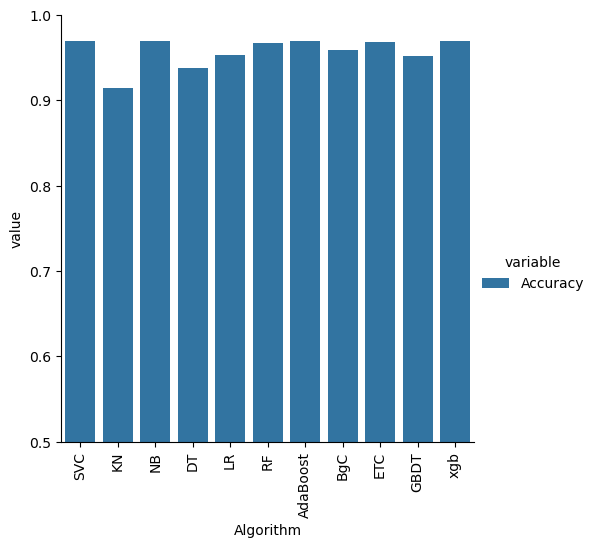

In [299]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [300]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [304]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores})

In [306]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,})

In [307]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [308]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [309]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,})

In [310]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Accuracy_scaling_x,Accuracy_scaling_y,Accuracy_num_chars
0,SVC,0.969082,0.969082,0.969082,0.969082
1,KN,0.914976,0.914976,0.914976,0.914976
2,NB,0.969082,0.969082,0.969082,0.969082
3,DT,0.938164,0.938164,0.938164,0.938164
4,LR,0.953623,0.953623,0.953623,0.953623
5,RF,0.967150,0.967150,0.967150,0.967150
6,AdaBoost,0.969082,0.969082,0.969082,0.969082
7,BgC,0.958454,0.958454,0.958454,0.958454
8,ETC,0.968116,0.968116,0.968116,0.968116
9,GBDT,0.951691,0.951691,0.951691,0.951691


In [311]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [312]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [313]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [314]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758454106280193


In [315]:
# Applying stacking
estimators=[ ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [316]:
from sklearn.ensemble import StackingClassifier

In [317]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [318]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748792270531401


In [319]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [320]:
import pickle 

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))


In [321]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [322]:
X_test.shape

(1035, 3000)

In [ ]:
import nltk 


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
transformed_sms = transform_text(input())
vector_input = tfidf.transform([transformed_sms])
            # Predict
print('this is vector: ',vector_input.shape)
result = model.predict(vector_input)[0]
result

In [ ]:
result